In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap

In [2]:
df = pd.read_csv("./Porocarcinoma_With_Poroma.ndpi (2).txt", sep="\t")

In [3]:
df.shape

(43664, 61)

In [4]:
df.Image

0        Porocarcinoma_With_Poroma.ndpi
1        Porocarcinoma_With_Poroma.ndpi
2        Porocarcinoma_With_Poroma.ndpi
3        Porocarcinoma_With_Poroma.ndpi
4        Porocarcinoma_With_Poroma.ndpi
                      ...              
43659    Porocarcinoma_With_Poroma.ndpi
43660    Porocarcinoma_With_Poroma.ndpi
43661    Porocarcinoma_With_Poroma.ndpi
43662    Porocarcinoma_With_Poroma.ndpi
43663    Porocarcinoma_With_Poroma.ndpi
Name: Image, Length: 43664, dtype: object

In [5]:
df.replace({"Porocarcinoma_With_Poroma.ndpi": "Porocarcinoma_With_Poroma.ndpi (2)"}, inplace=True)

In [6]:
df.Image

0        Porocarcinoma_With_Poroma.ndpi (2)
1        Porocarcinoma_With_Poroma.ndpi (2)
2        Porocarcinoma_With_Poroma.ndpi (2)
3        Porocarcinoma_With_Poroma.ndpi (2)
4        Porocarcinoma_With_Poroma.ndpi (2)
                        ...                
43659    Porocarcinoma_With_Poroma.ndpi (2)
43660    Porocarcinoma_With_Poroma.ndpi (2)
43661    Porocarcinoma_With_Poroma.ndpi (2)
43662    Porocarcinoma_With_Poroma.ndpi (2)
43663    Porocarcinoma_With_Poroma.ndpi (2)
Name: Image, Length: 43664, dtype: object

In [7]:
df = df[["Image", "Parent", 'Centroid X µm',
       'Centroid Y µm', 'Nucleus: Area µm^2',
       'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Max diameter µm', 'Nucleus: Min diameter µm',
       'Hematoxylin: Nucleus: Mean',
       'Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 'Hematoxylin: Nucleus: Std.Dev.',
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cytoplasm: Median',
       'Hematoxylin: Cytoplasm: Min', 'Hematoxylin: Cytoplasm: Max',
       'Hematoxylin: Cytoplasm: Std.Dev.', 
       'Hematoxylin: Cell: Mean', 'Hematoxylin: Cell: Median',
       'Hematoxylin: Cell: Min', 'Hematoxylin: Cell: Max',
       'Hematoxylin: Cell: Std.Dev.', 'Eosin: Nucleus: Mean',
       'Eosin: Nucleus: Median', 'Eosin: Nucleus: Min', 'Eosin: Nucleus: Max',
       'Eosin: Nucleus: Std.Dev.', 'Eosin: Cytoplasm: Mean',
       'Eosin: Cytoplasm: Median', 'Eosin: Cytoplasm: Min',
       'Eosin: Cytoplasm: Max', 'Eosin: Cytoplasm: Std.Dev.',
        'Eosin: Cell: Mean', 'Eosin: Cell: Median',
       'Eosin: Cell: Min', 'Eosin: Cell: Max', 'Eosin: Cell: Std.Dev.']]
df.dropna(inplace=True)
X = df.drop(["Image", "Parent", 'Centroid X µm',
       'Centroid Y µm'], axis=1)

<ipython-input-7-08e445a749c4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df

,Image,Parent,Centroid X µm,Centroid Y µm,Nucleus: Area µm^2,Nucleus: Length µm,Nucleus: Circularity,Nucleus: Max diameter µm,Nucleus: Min diameter µm,Hematoxylin: Nucleus: Mean,...,Eosin: Cytoplasm: Mean,Eosin: Cytoplasm: Median,Eosin: Cytoplasm: Min,Eosin: Cytoplasm: Max,Eosin: Cytoplasm: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,Porocarcinoma_With_Poroma.ndpi (2),A,42903.8,3319.5,19.3080,17.2092,0.8193,6.3772,4.5940,0.3521,...,0.2259,0.2281,0.1318,0.3027,0.0366,0.2007,0.1943,0.1061,0.3027,0.0461
1,Porocarcinoma_With_Poroma.ndpi (2),A,42921.9,3321.5,24.0603,23.4752,0.5486,6.5583,5.0648,0.4439,...,0.2468,0.2523,0.1491,0.3000,0.0272,0.2272,0.2360,0.0953,0.3408,0.0430
2,Porocarcinoma_With_Poroma.ndpi (2),A,42914.1,3322.8,13.1488,13.2636,0.9392,4.6454,3.9441,0.2882,...,0.2520,0.2566,0.1535,0.3125,0.0282,0.2438,0.2468,0.1535,0.3125,0.0321
3,Porocarcinoma_With_Poroma.ndpi (2),A,42906.9,3324.8,22.7849,17.2488,0.9624,5.7718,5.2190,0.2628,...,0.2459,0.2472,0.1604,0.2940,0.0223,0.2322,0.2325,0.1489,0.2940,0.0286
4,Porocarcinoma_With_Poroma.ndpi (2),A,42894.8,3326.6,26.3264,19.1818,0.8991,7.1914,5.0367,0.4431,...,0.2455,0.2515,0.1251,0.3112,0.0315,0.2238,0.2408,0.0056,0.3112,0.0492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43659,Porocarcinoma_With_Poroma.ndpi (2),H,29222.2,22000.7,15.9640,15.2149,0.8666,5.5169,3.6465,0.6731,...,0.1584,0.1627,-0.0506,0.2998,0.0526,0.1513,0.1545,-0.0959,0.2998,0.0541
43660,Porocarcinoma_With_Poroma.ndpi (2),H,29197.4,22000.7,23.0560,20.4014,0.6961,8.7498,3.4507,0.4132,...,0.1809,0.1845,0.0581,0.2468,0.0353,0.1759,0.1822,0.0437,0.2468,0.0390
43661,Porocarcinoma_With_Poroma.ndpi (2),H,29342.7,22000.8,19.6802,17.6502,0.7939,7.1213,3.3730,0.4464,...,0.1672,0.1763,0.0519,0.2919,0.0592,0.1577,0.1575,-0.0602,0.2919,0.0591
43662,Porocarcinoma_With_Poroma.ndpi (2),H,29297.9,22001.4,8.0815,11.9923,0.7061,4.8010,2.1934,0.6944,...,0.1105,0.1035,0.0386,0.2274,0.0310,0.1028,0.1027,-0.1972,0.2700,0.0645


In [9]:
X

,Nucleus: Area µm^2,Nucleus: Length µm,Nucleus: Circularity,Nucleus: Max diameter µm,Nucleus: Min diameter µm,Hematoxylin: Nucleus: Mean,Hematoxylin: Nucleus: Median,Hematoxylin: Nucleus: Min,Hematoxylin: Nucleus: Max,Hematoxylin: Nucleus: Std.Dev.,...,Eosin: Cytoplasm: Mean,Eosin: Cytoplasm: Median,Eosin: Cytoplasm: Min,Eosin: Cytoplasm: Max,Eosin: Cytoplasm: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,19.3080,17.2092,0.8193,6.3772,4.5940,0.3521,0.3531,0.1642,0.5719,0.0792,...,0.2259,0.2281,0.1318,0.3027,0.0366,0.2007,0.1943,0.1061,0.3027,0.0461
1,24.0603,23.4752,0.5486,6.5583,5.0648,0.4439,0.4193,0.1287,0.7529,0.1472,...,0.2468,0.2523,0.1491,0.3000,0.0272,0.2272,0.2360,0.0953,0.3408,0.0430
2,13.1488,13.2636,0.9392,4.6454,3.9441,0.2882,0.2870,0.0712,0.6140,0.1117,...,0.2520,0.2566,0.1535,0.3125,0.0282,0.2438,0.2468,0.1535,0.3125,0.0321
3,22.7849,17.2488,0.9624,5.7718,5.2190,0.2628,0.2600,0.0856,0.4199,0.0627,...,0.2459,0.2472,0.1604,0.2940,0.0223,0.2322,0.2325,0.1489,0.2940,0.0286
4,26.3264,19.1818,0.8991,7.1914,5.0367,0.4431,0.4243,0.0963,0.8281,0.1447,...,0.2455,0.2515,0.1251,0.3112,0.0315,0.2238,0.2408,0.0056,0.3112,0.0492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43659,15.9640,15.2149,0.8666,5.5169,3.6465,0.6731,0.7298,0.0195,1.2631,0.3039,...,0.1584,0.1627,-0.0506,0.2998,0.0526,0.1513,0.1545,-0.0959,0.2998,0.0541
43660,23.0560,20.4014,0.6961,8.7498,3.4507,0.4132,0.3913,0.1063,0.7406,0.1496,...,0.1809,0.1845,0.0581,0.2468,0.0353,0.1759,0.1822,0.0437,0.2468,0.0390
43661,19.6802,17.6502,0.7939,7.1213,3.3730,0.4464,0.4025,0.0134,1.4215,0.2980,...,0.1672,0.1763,0.0519,0.2919,0.0592,0.1577,0.1575,-0.0602,0.2919,0.0591
43662,8.0815,11.9923,0.7061,4.8010,2.1934,0.6944,0.6343,0.0025,1.4734,0.4533,...,0.1105,0.1035,0.0386,0.2274,0.0310,0.1028,0.1027,-0.1972,0.2700,0.0645


In [27]:
feature = ['Nucleus: Area µm^2', 'Nucleus: Length µm',
       'Nucleus: Circularity', 'Nucleus: Max diameter µm','Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cell: Mean',
       'Hematoxylin: Cell: Median', 
       'Eosin: Nucleus: Mean',  'Eosin: Cell: Mean']

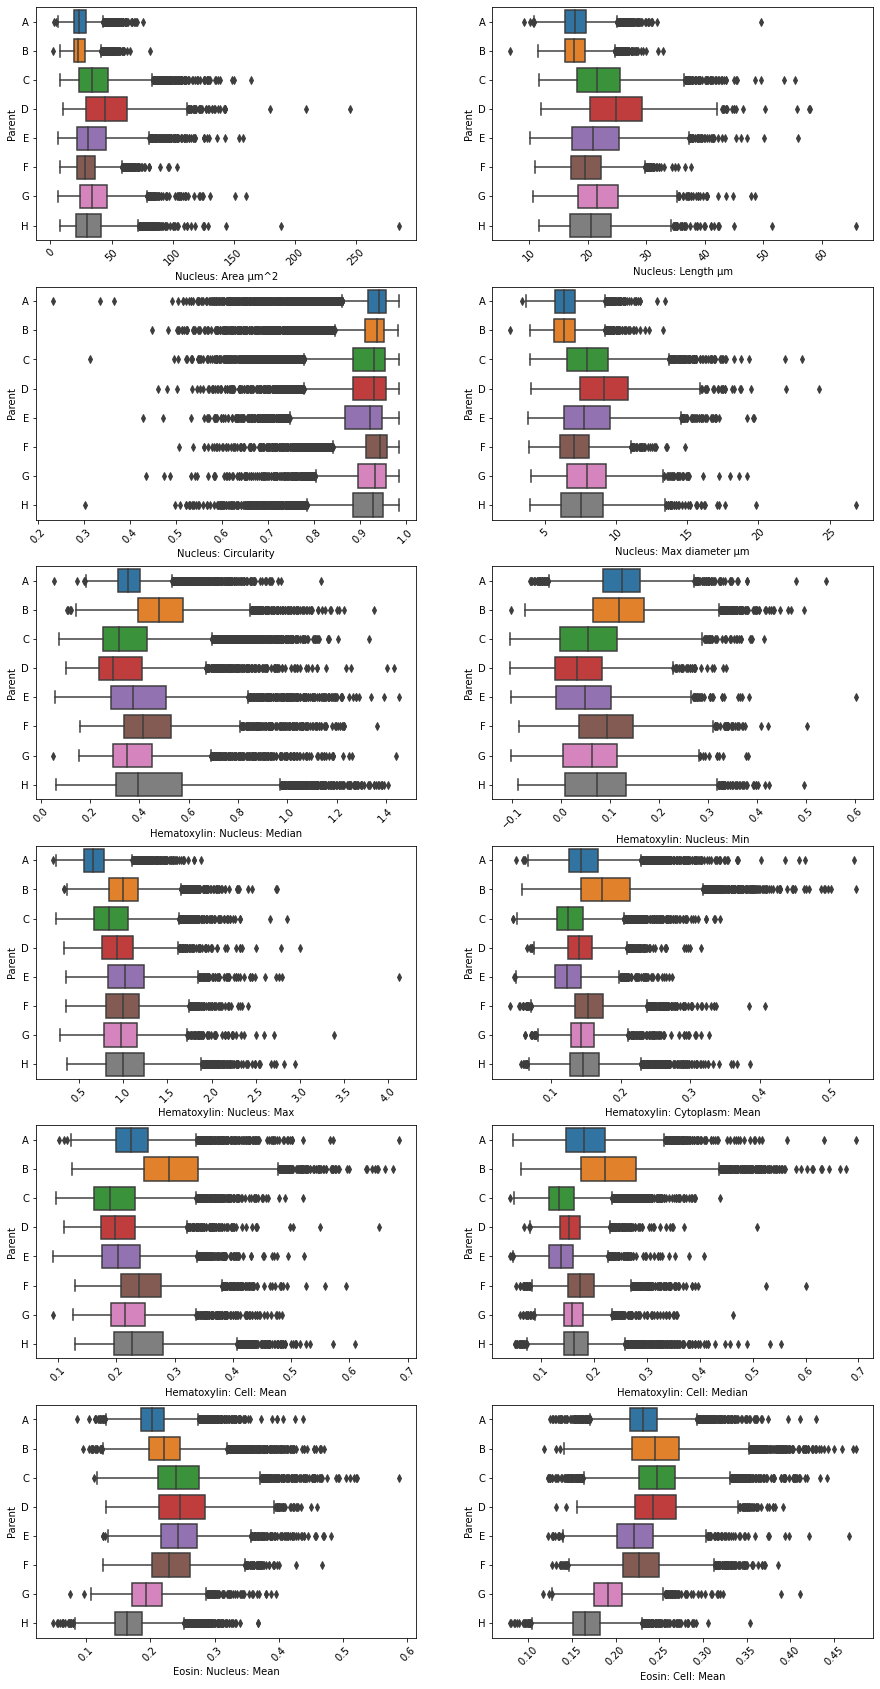

In [28]:
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 2, i[0]+1)
    sns.boxplot(x=i[1], y="Parent", data = df)
    plt.xticks(rotation = 45)

In [10]:
Scaler = StandardScaler()
x_std = Scaler.fit_transform(X)

In [11]:
reducer = umap.UMAP()
mapper = reducer.fit(x_std)

In [12]:
embedding = mapper.embedding_
UMAPData = pd.DataFrame(embedding, columns=["x", "y"])
UMAPData["Name"] = df.Parent

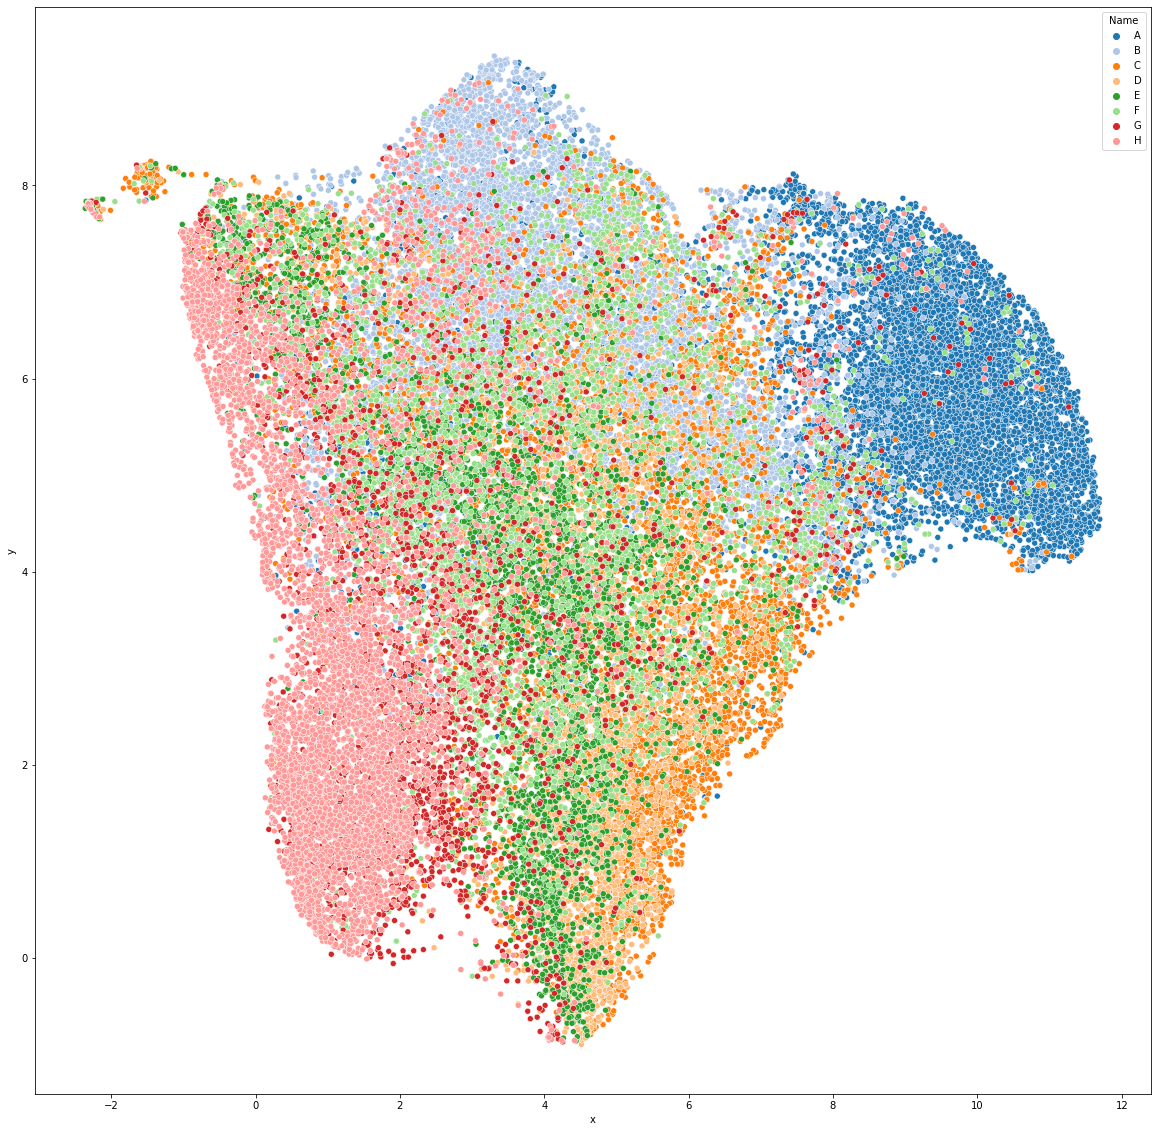

In [13]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData.Name, palette="tab20")
plt.savefig("UMAP_region_3.png")

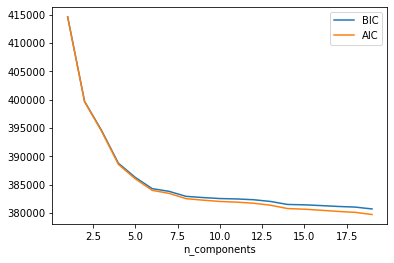

In [14]:
import numpy as np
from sklearn.mixture import GaussianMixture  as GMM
n_components = np.arange(1, 20)
models = [GMM(n_components=n, covariance_type='full', random_state=0, max_iter=500).fit(embedding)
          for n in n_components]

plt.plot(n_components, [m.bic(embedding) for m in models], label='BIC')
plt.plot(n_components, [m.aic(embedding) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [15]:
from sklearn.mixture import GaussianMixture as GMM     # 1. Choose the model class

model = GMM(n_components=10,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters　#BGMMではなくGMMを使ってしまっている！！
model.fit(embedding)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(embedding)        # 4. Determine cluster labels


In [16]:
y_gmm

array([4, 1, 4, ..., 0, 5, 2])

In [17]:
df["GMM_cluster"] = y_gmm + 1

<AxesSubplot:xlabel='x', ylabel='y'>

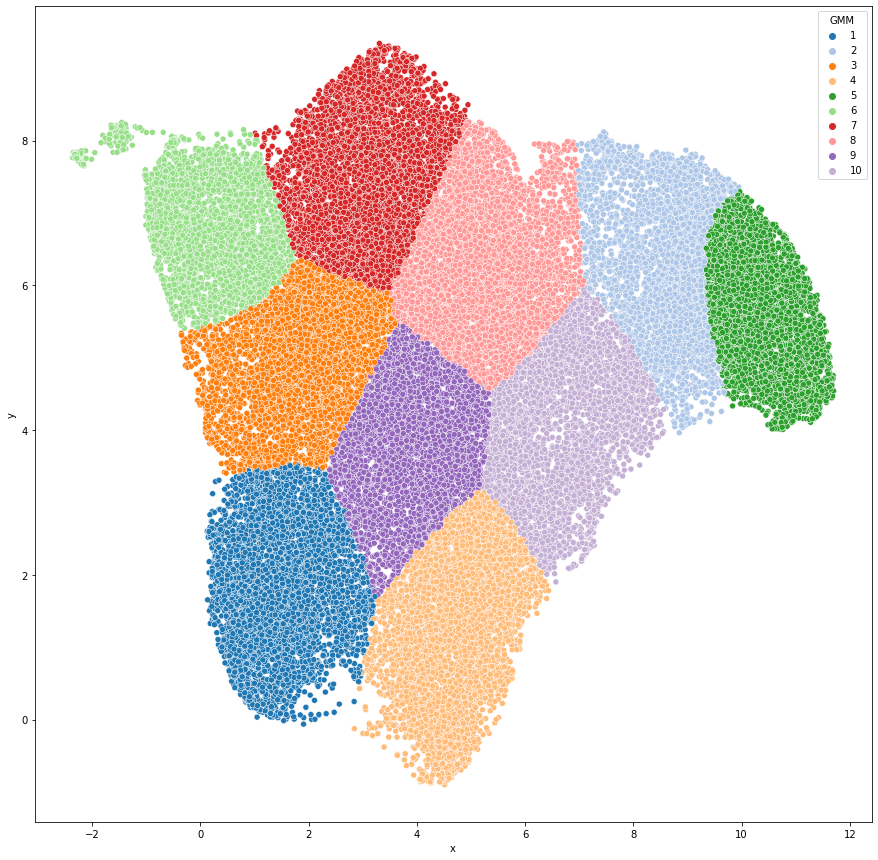

In [18]:
UMAPData["GMM"] = y_gmm + 1
plt.figure(figsize=(15, 15))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData["GMM"], palette="tab20")


In [19]:
crosstb = pd.crosstab(UMAPData.Name, UMAPData.GMM, normalize="index")

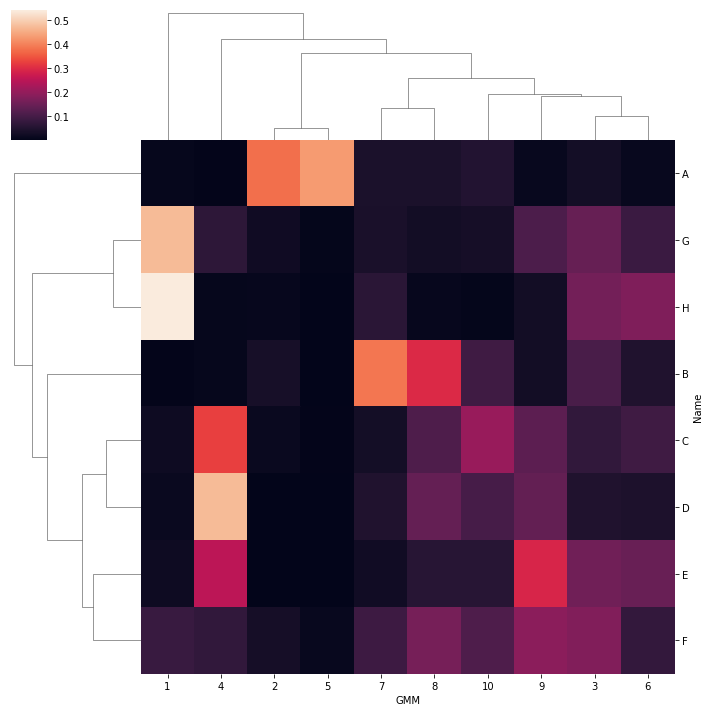

In [22]:
g = sns.clustermap(crosstb)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.savefig("Clustermap_3.png")

In [23]:
df_export = df[['Centroid X µm', 'Centroid Y µm', "Image", 'GMM_cluster']]

In [24]:
df_export.reset_index(inplace=True, drop=True)

In [25]:
df_export

,Centroid X µm,Centroid Y µm,Image,GMM_cluster
0,42903.8,3319.5,Porocarcinoma_With_Poroma.ndpi (2),5
1,42921.9,3321.5,Porocarcinoma_With_Poroma.ndpi (2),2
2,42914.1,3322.8,Porocarcinoma_With_Poroma.ndpi (2),5
3,42906.9,3324.8,Porocarcinoma_With_Poroma.ndpi (2),5
4,42894.8,3326.6,Porocarcinoma_With_Poroma.ndpi (2),2
...,...,...,...,...
43654,29222.2,22000.7,Porocarcinoma_With_Poroma.ndpi (2),7
43655,29197.4,22000.7,Porocarcinoma_With_Poroma.ndpi (2),1
43656,29342.7,22000.8,Porocarcinoma_With_Poroma.ndpi (2),1
43657,29297.9,22001.4,Porocarcinoma_With_Poroma.ndpi (2),6


In [61]:
df_export.GMM_cluster.value_counts()

3     7992
10    7474
9     6961
6     6924
2     6856
7     6703
11    6655
1     6439
8     6332
4     6276
5     5522
12    4438
Name: GMM_cluster, dtype: int64

In [26]:
df_export.to_csv("Porocarcinoma_Progression_2_with_AtoH.csv", index=False)